In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import os

warnings.filterwarnings("ignore")

# Set style for matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Libraries imported successfully")
print("\n" + "="*70)
print("📊 EXPLORATORY DATA ANALYSIS (EDA)")
print("="*70)

✅ Libraries imported successfully

📊 EXPLORATORY DATA ANALYSIS (EDA)


In [3]:
print("\n📥 Loading cleaned datasets...")

dataset1_cleaned_path = "../../data/cleaned/economic_indicators_cleaned.csv"
dataset1_std_path = "../../data/cleaned/economic_indicators_standardized.csv"

# Load datasets
df_economic = pd.read_csv(dataset1_cleaned_path)

# Load standardized versions
df_economic_std = pd.read_csv(dataset1_std_path)

print(f"\n✅ Datasets loaded successfully!")
print(f"\n   Dataset 1: Economic Indicators")
print(f"      Shape: {df_economic.shape}")
print(f"      Countries: {df_economic['Country'].nunique()}")

# Create output directory for plots
output_dir = "../../outputs/eda"
os.makedirs(output_dir, exist_ok=True)
print(f"\n   📁 Output directory: {output_dir}")


📥 Loading cleaned datasets...

✅ Datasets loaded successfully!

   Dataset 1: Economic Indicators
      Shape: (265, 66)
      Countries: 265

   📁 Output directory: ../../outputs/eda


In [4]:
print("\n" + "="*70)
print("📊 BASIC STATISTICAL SUMMARY")
print("="*70)

# Dataset 1 - Economic Indicators
print("\n📈 DATASET 1: Economic Indicators")
print("-" * 70)

numeric_cols_d1 = df_economic.select_dtypes(include=[np.number]).columns

print(f"\nNumber of numeric features: {len(numeric_cols_d1)}")
print(f"\nDescriptive Statistics (first 10 features):")
display(df_economic[numeric_cols_d1[:10]].describe().T)

# Check data quality
print(f"\n📊 Data Quality Check:")
print(f"   Total rows: {len(df_economic)}")
print(f"   Total columns: {len(df_economic.columns)}")
print(f"   Missing values: {df_economic.isnull().sum().sum()}")


📊 BASIC STATISTICAL SUMMARY

📈 DATASET 1: Economic Indicators
----------------------------------------------------------------------

Number of numeric features: 65

Descriptive Statistics (first 10 features):


,count,mean,std,min,25%,50%,75%,max
"Gross national income, Atlas method_$ billions_2024",265.0,1652.078562,8983.736464,0.086041,16.579700,45.096050,219.241000,109382.598282
"Gross national income per capita, Atlas method_$_2024",265.0,16707.983269,21842.802638,190.000000,3740.000000,7990.000000,20690.000000,140280.000000
Purchasing power parity gross national income_$ billions_2024,265.0,2968.488710,15293.623847,0.081645,49.621200,115.356000,436.190000,196083.729275
Purchasing power parity gross national income_per capita_$_2024,265.0,27749.932907,25403.408323,950.000000,10570.000000,20220.000000,35130.000000,126190.000000
Gross domestic product_% growth_2024,265.0,3.161744,3.999071,-26.557526,2.029484,3.235649,4.200000,43.372009
Gross domestic product_per capita_% growth_2024,265.0,2.080318,4.221382,-28.270677,0.827703,2.105942,3.272362,42.555340
GDP_Growth_Gross domestic product_average annual real growth (%)_2010-2020,265.0,2.617925,2.419560,-11.700000,1.500000,2.750000,3.800000,9.300000
GDP_Growth_Gross domestic product_average annual real growth (%)_2020-2024,265.0,3.998868,3.865215,-13.100000,2.900000,3.800000,5.200000,40.900000
GDP_Growth_Agriculture_average annual real growth (%)_2010-2020,265.0,2.140189,2.764353,-15.200000,1.300000,2.250000,3.000000,17.100000
GDP_Growth_Agriculture_average annual real growth (%)_2020-2024,265.0,1.122264,4.744701,-35.400000,0.300000,1.800000,3.000000,28.800000



📊 Data Quality Check:
   Total rows: 265
   Total columns: 66
   Missing values: 0



📊 DISTRIBUTION ANALYSIS - DATASET 1

📊 Creating histograms for 12 key indicators...
   ✅ Saved: ../../outputs/eda/distributions_economic_indicators.png


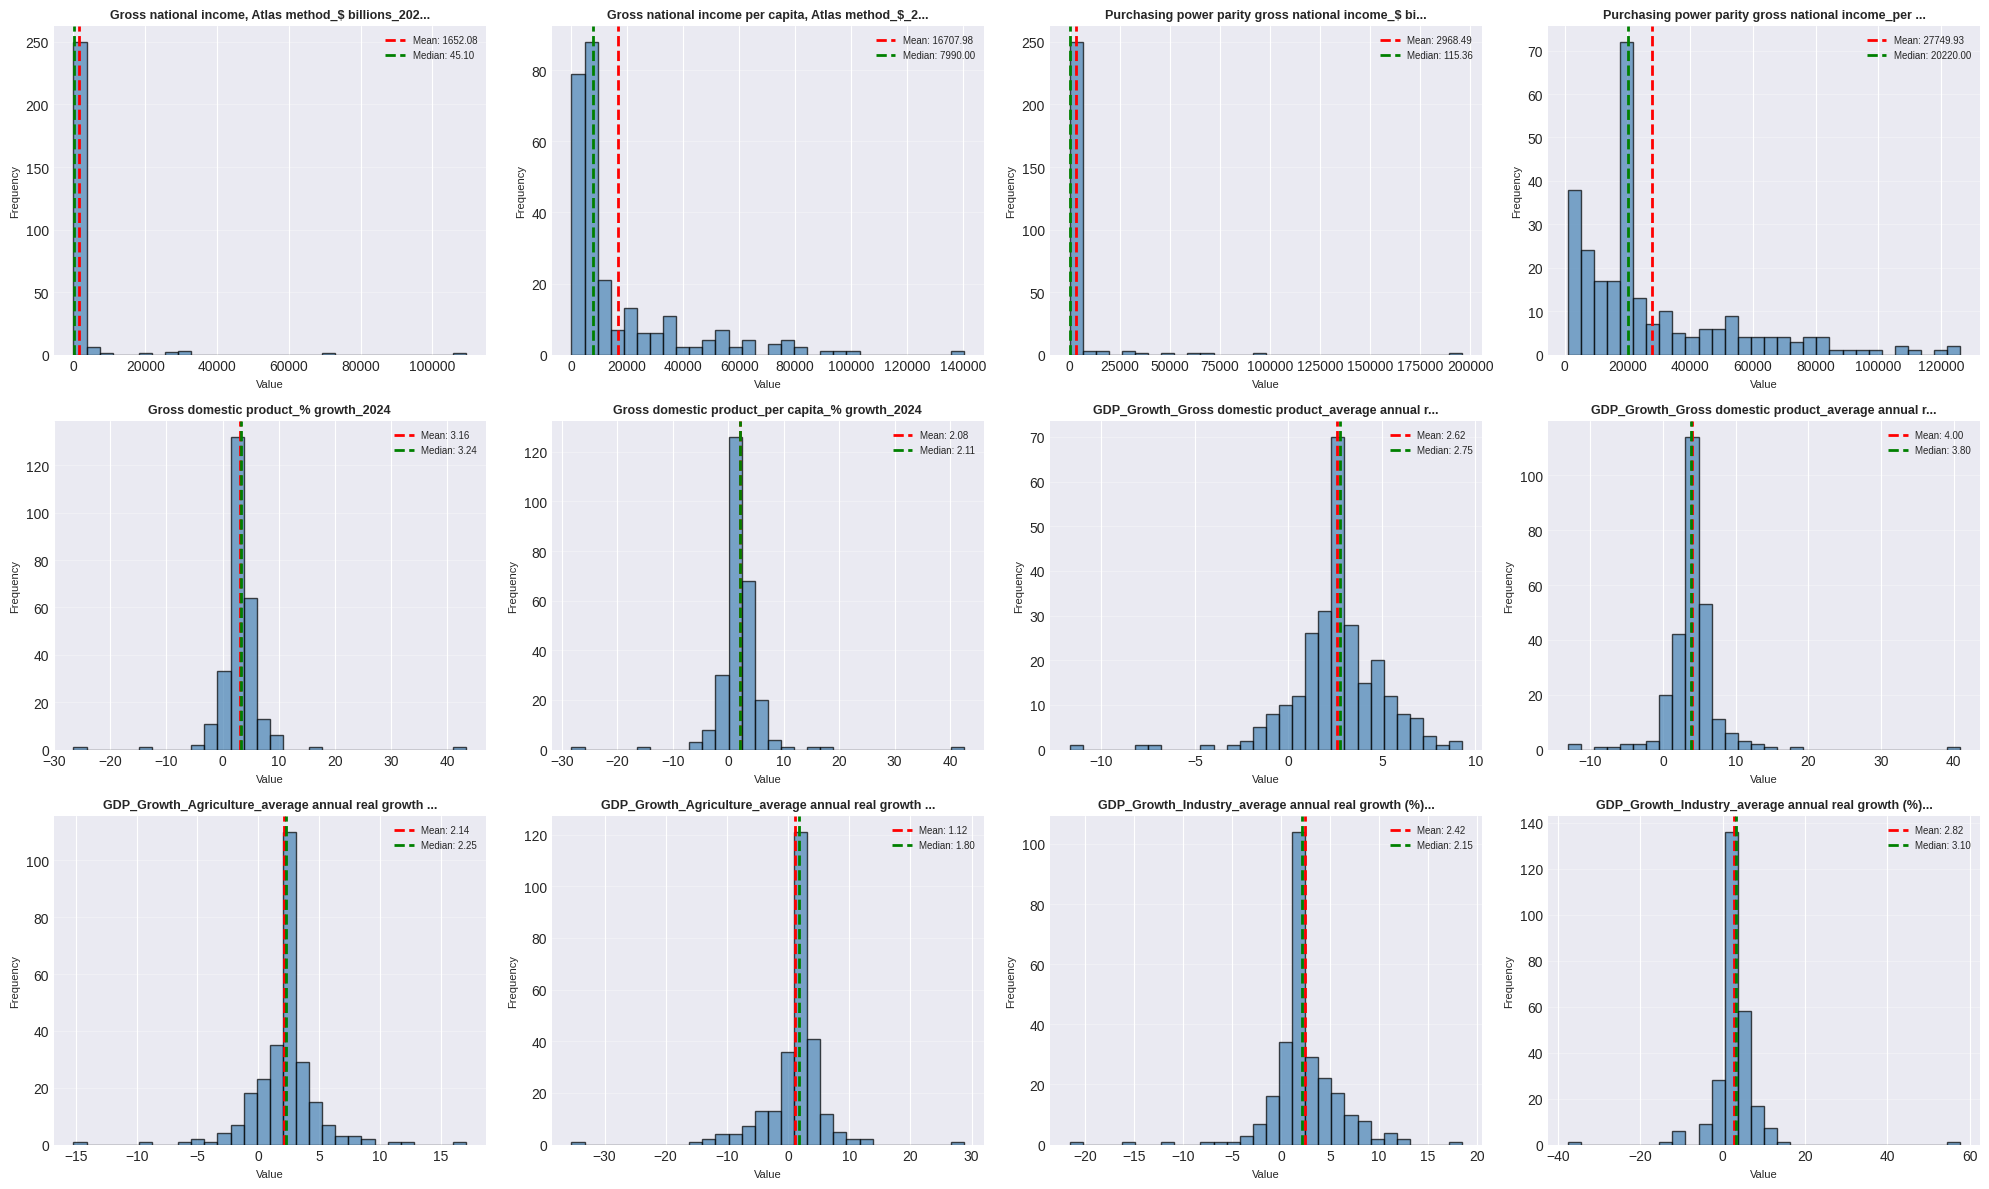

In [5]:
print("\n" + "="*70)
print("📊 DISTRIBUTION ANALYSIS - DATASET 1")
print("="*70)

# Select key economic indicators for visualization
key_indicators_d1 = [
    col for col in numeric_cols_d1 
    if any(keyword in col for keyword in ['GDP', 'income', 'growth'])
][:12]  # Top 12

if len(key_indicators_d1) > 0:
    print(f"\n📊 Creating histograms for {len(key_indicators_d1)} key indicators...")
    
    # Create subplots
    n_cols = 4
    n_rows = (len(key_indicators_d1) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(key_indicators_d1):
        ax = axes[idx]
        
        # Plot histogram
        data = df_economic[col].dropna()
        ax.hist(data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        
        # Add statistics
        mean_val = data.mean()
        median_val = data.median()
        
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        
        # Formatting
        ax.set_title(col[:50] + ('...' if len(col) > 50 else ''), fontsize=9, fontweight='bold')
        ax.set_xlabel('Value', fontsize=8)
        ax.set_ylabel('Frequency', fontsize=8)
        ax.legend(fontsize=7)
        ax.grid(axis='y', alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(key_indicators_d1), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/distributions_economic_indicators.png', dpi=300, bbox_inches='tight')
    print(f"   ✅ Saved: {output_dir}/distributions_economic_indicators.png")
    plt.show()
else:
    print("   ⚠️ No suitable columns found for visualization")


🔥 CORRELATION ANALYSIS - DATASET 1

📊 Creating correlation heatmap for Economic Indicators...
   ✅ Saved: ../../outputs/eda/correlation_heatmap_economic.png


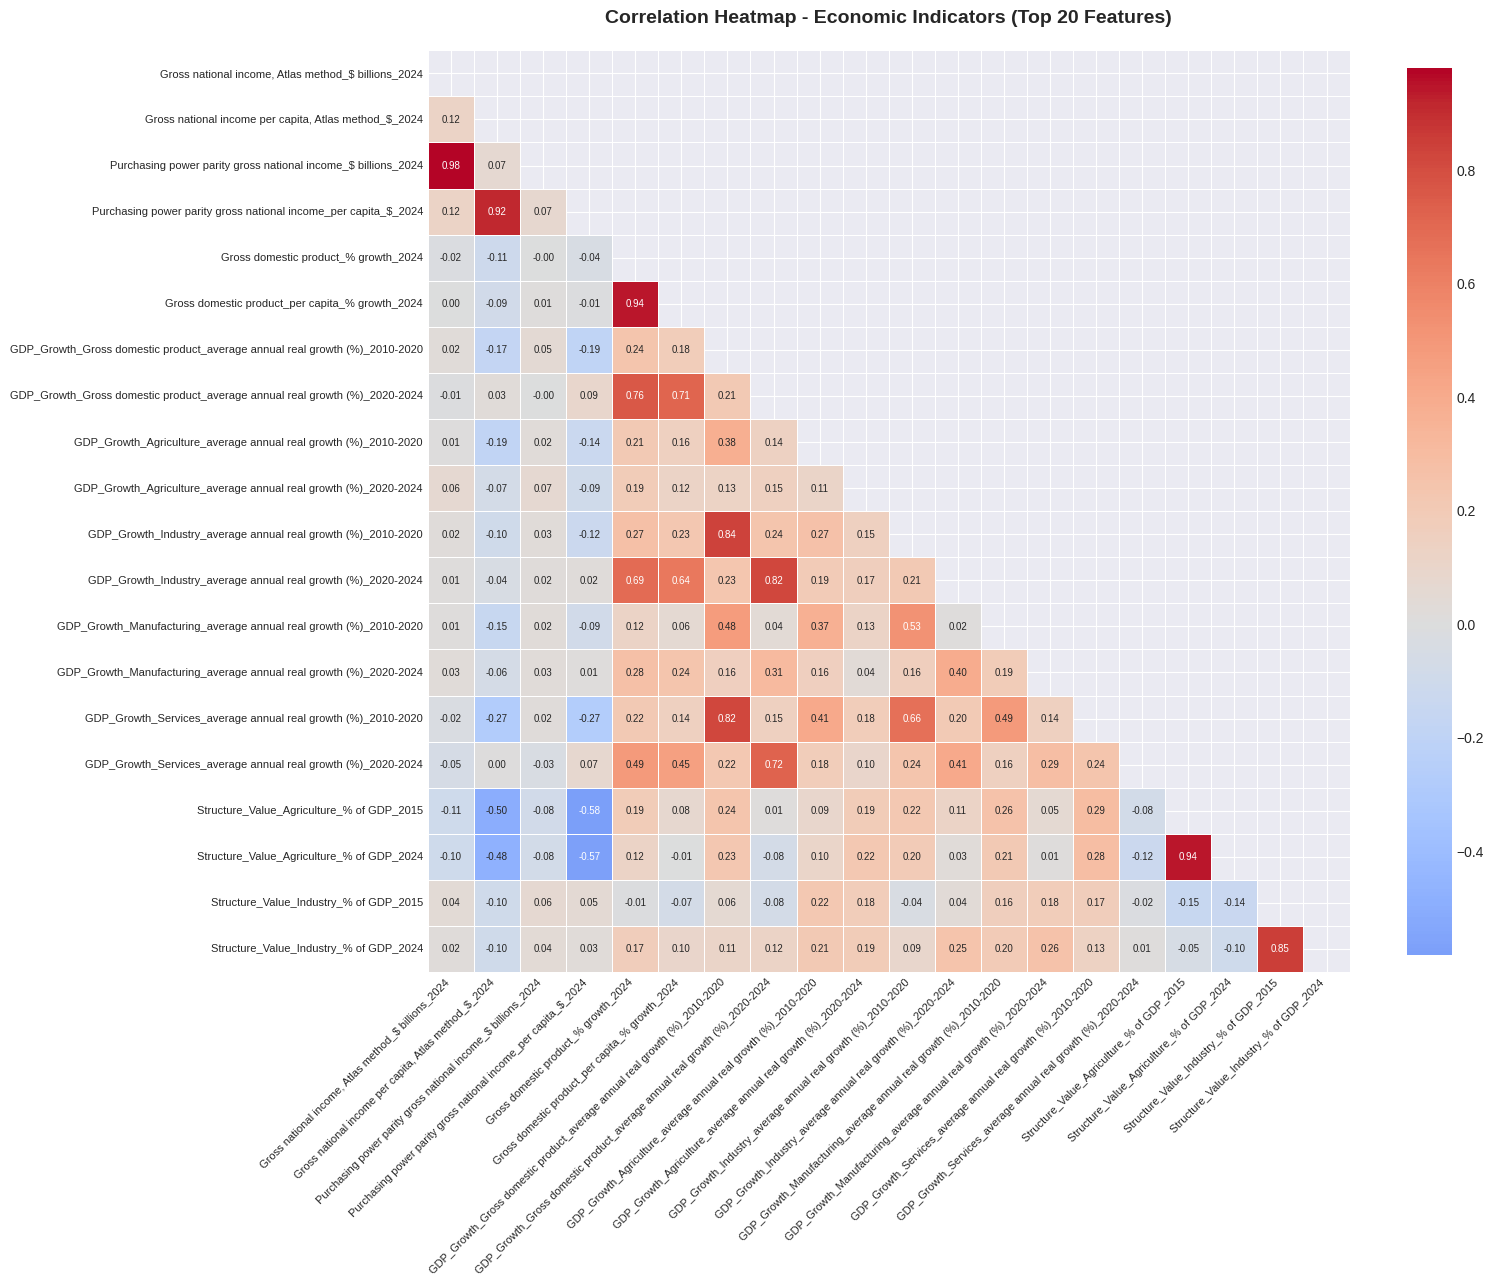


📊 Strongest Positive Correlations (> 0.7):


,Feature 1,Feature 2,Correlation
0,"Gross national income, Atlas method_$ billions...",Purchasing power parity gross national income_...,0.980104
9,Structure_Value_Agriculture_% of GDP_2015,Structure_Value_Agriculture_% of GDP_2024,0.939652
2,Gross domestic product_% growth_2024,Gross domestic product_per capita_% growth_2024,0.939567
1,"Gross national income per capita, Atlas method...",Purchasing power parity gross national income_...,0.916938
10,Structure_Value_Industry_% of GDP_2015,Structure_Value_Industry_% of GDP_2024,0.851937
5,GDP_Growth_Gross domestic product_average annu...,GDP_Growth_Industry_average annual real growth...,0.837003
6,GDP_Growth_Gross domestic product_average annu...,GDP_Growth_Services_average annual real growth...,0.823649
7,GDP_Growth_Gross domestic product_average annu...,GDP_Growth_Industry_average annual real growth...,0.816214
3,Gross domestic product_% growth_2024,GDP_Growth_Gross domestic product_average annu...,0.760891
8,GDP_Growth_Gross domestic product_average annu...,GDP_Growth_Services_average annual real growth...,0.723563


In [6]:
print("\n" + "="*70)
print("🔥 CORRELATION ANALYSIS - DATASET 1")
print("="*70)

print("\n📊 Creating correlation heatmap for Economic Indicators...")

# Select subset of columns for better visualization
important_cols_d1 = [col for col in numeric_cols_d1 if any(
    keyword in col for keyword in ['GDP', 'income', 'growth', 'Unemployment', 'Manufacturing']
)][:20]  # Limit to 20 for readability

if len(important_cols_d1) > 0:
    # Calculate correlation matrix
    corr_matrix_d1 = df_economic[important_cols_d1].corr()
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(16, 14))
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix_d1, dtype=bool))
    
    sns.heatmap(corr_matrix_d1, 
                mask=mask,
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": 0.8},
                annot_kws={'size': 7},
                ax=ax)
    
    ax.set_title('Correlation Heatmap - Economic Indicators (Top 20 Features)', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Rotate labels
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/correlation_heatmap_economic.png', dpi=300, bbox_inches='tight')
    print(f"   ✅ Saved: {output_dir}/correlation_heatmap_economic.png")
    plt.show()
    
    # Find strongest correlations
    print("\n📊 Strongest Positive Correlations (> 0.7):")
    strong_corr = []
    for i in range(len(corr_matrix_d1.columns)):
        for j in range(i+1, len(corr_matrix_d1.columns)):
            if abs(corr_matrix_d1.iloc[i, j]) > 0.7:
                strong_corr.append({
                    'Feature 1': corr_matrix_d1.columns[i],
                    'Feature 2': corr_matrix_d1.columns[j],
                    'Correlation': corr_matrix_d1.iloc[i, j]
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', ascending=False)
        display(strong_corr_df.head(10))
    else:
        print("   No correlations > 0.7 found")
else:
    print("   ⚠️ No suitable columns found for correlation analysis")


📦 BOX PLOT ANALYSIS - DATASET 1

📊 Creating box plots for key economic indicators...
   ✅ Saved: ../../outputs/eda/boxplots_economic_indicators.png


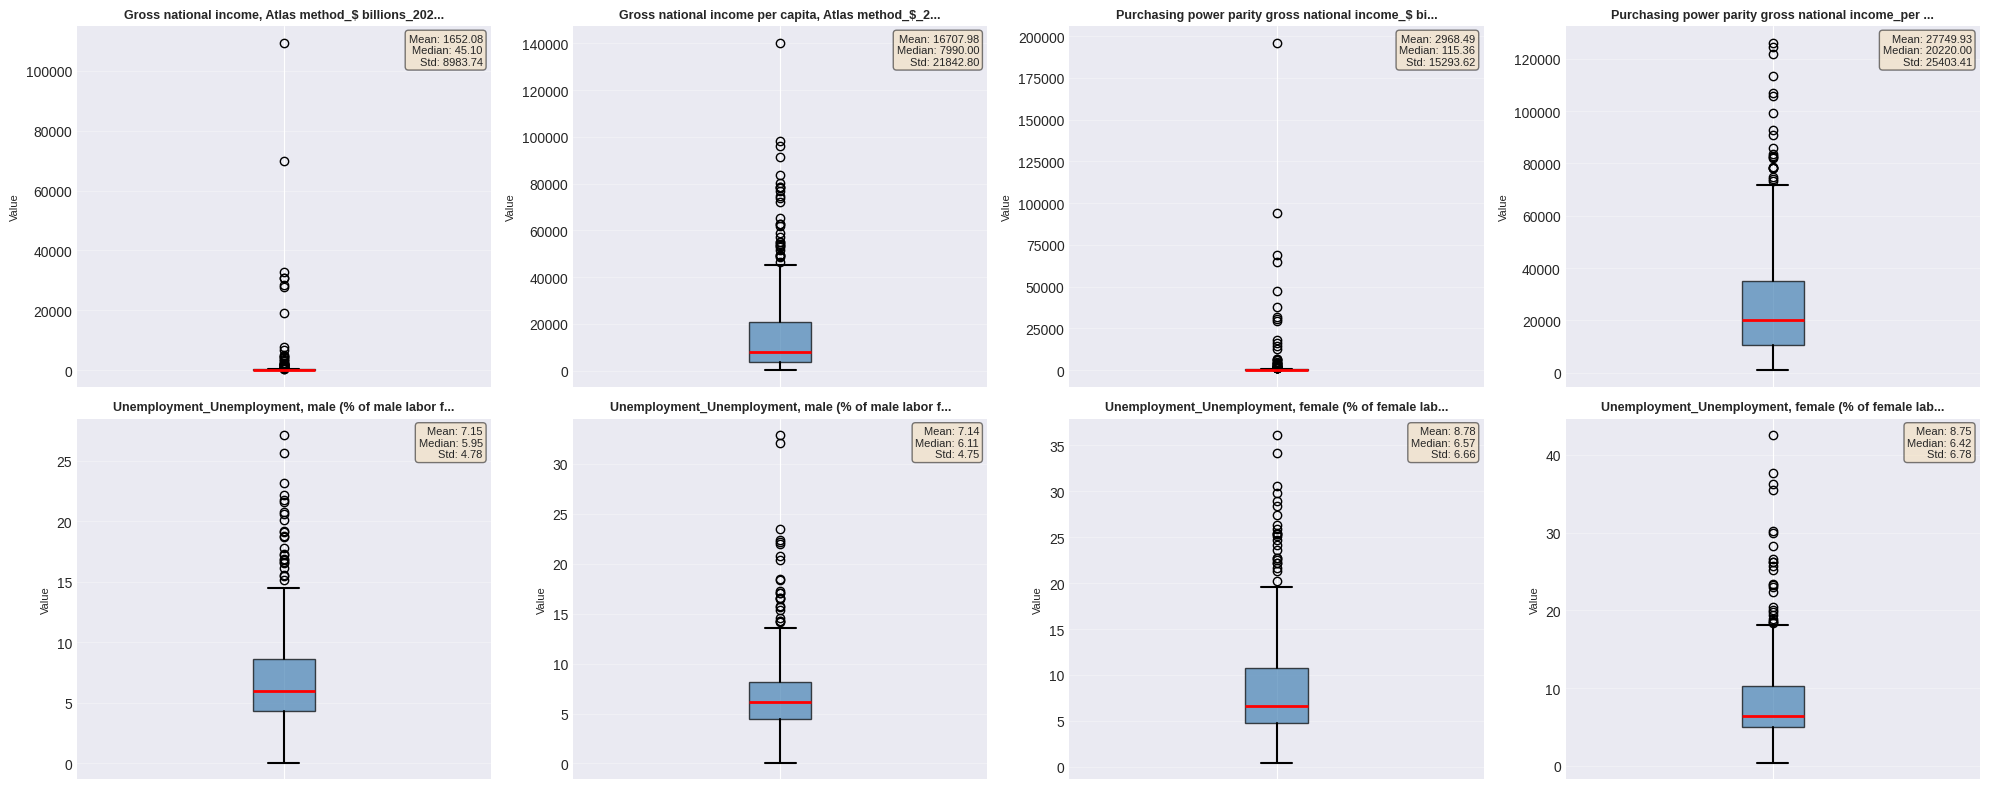

In [7]:
print("\n" + "="*70)
print("📦 BOX PLOT ANALYSIS - DATASET 1")
print("="*70)

print("\n📊 Creating box plots for key economic indicators...")

# Select key indicators
box_cols_d1 = [col for col in numeric_cols_d1 if any(
    keyword in col for keyword in ['GDP_growth', 'income', 'Unemployment']
)][:8]

if len(box_cols_d1) > 0:
    n_cols = 4
    n_rows = (len(box_cols_d1) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(box_cols_d1):
        ax = axes[idx]
        
        data = df_economic[col].dropna()
        
        bp = ax.boxplot([data], 
                        labels=[''],
                        patch_artist=True,
                        boxprops=dict(facecolor='steelblue', alpha=0.7),
                        medianprops=dict(color='red', linewidth=2),
                        whiskerprops=dict(linewidth=1.5),
                        capprops=dict(linewidth=1.5))
        
        # Add statistics text
        stats_text = f"Mean: {data.mean():.2f}\nMedian: {data.median():.2f}\nStd: {data.std():.2f}"
        ax.text(0.98, 0.98, stats_text,
                transform=ax.transAxes,
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=8)
        
        ax.set_title(col[:50] + ('...' if len(col) > 50 else ''), 
                    fontsize=9, fontweight='bold')
        ax.set_ylabel('Value', fontsize=8)
        ax.grid(axis='y', alpha=0.3)
    
    for idx in range(len(box_cols_d1), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/boxplots_economic_indicators.png', dpi=300, bbox_inches='tight')
    print(f"   ✅ Saved: {output_dir}/boxplots_economic_indicators.png")
    plt.show()
else:
    print("   ⚠️ No suitable columns found for box plots")


🔀 SCATTER PLOT MATRIX - DATASET 1

📊 Creating pair plot for top economic indicators...
   Analyzing 5 variables...
   ✅ Saved: ../../outputs/eda/pairplot_economic_indicators.png


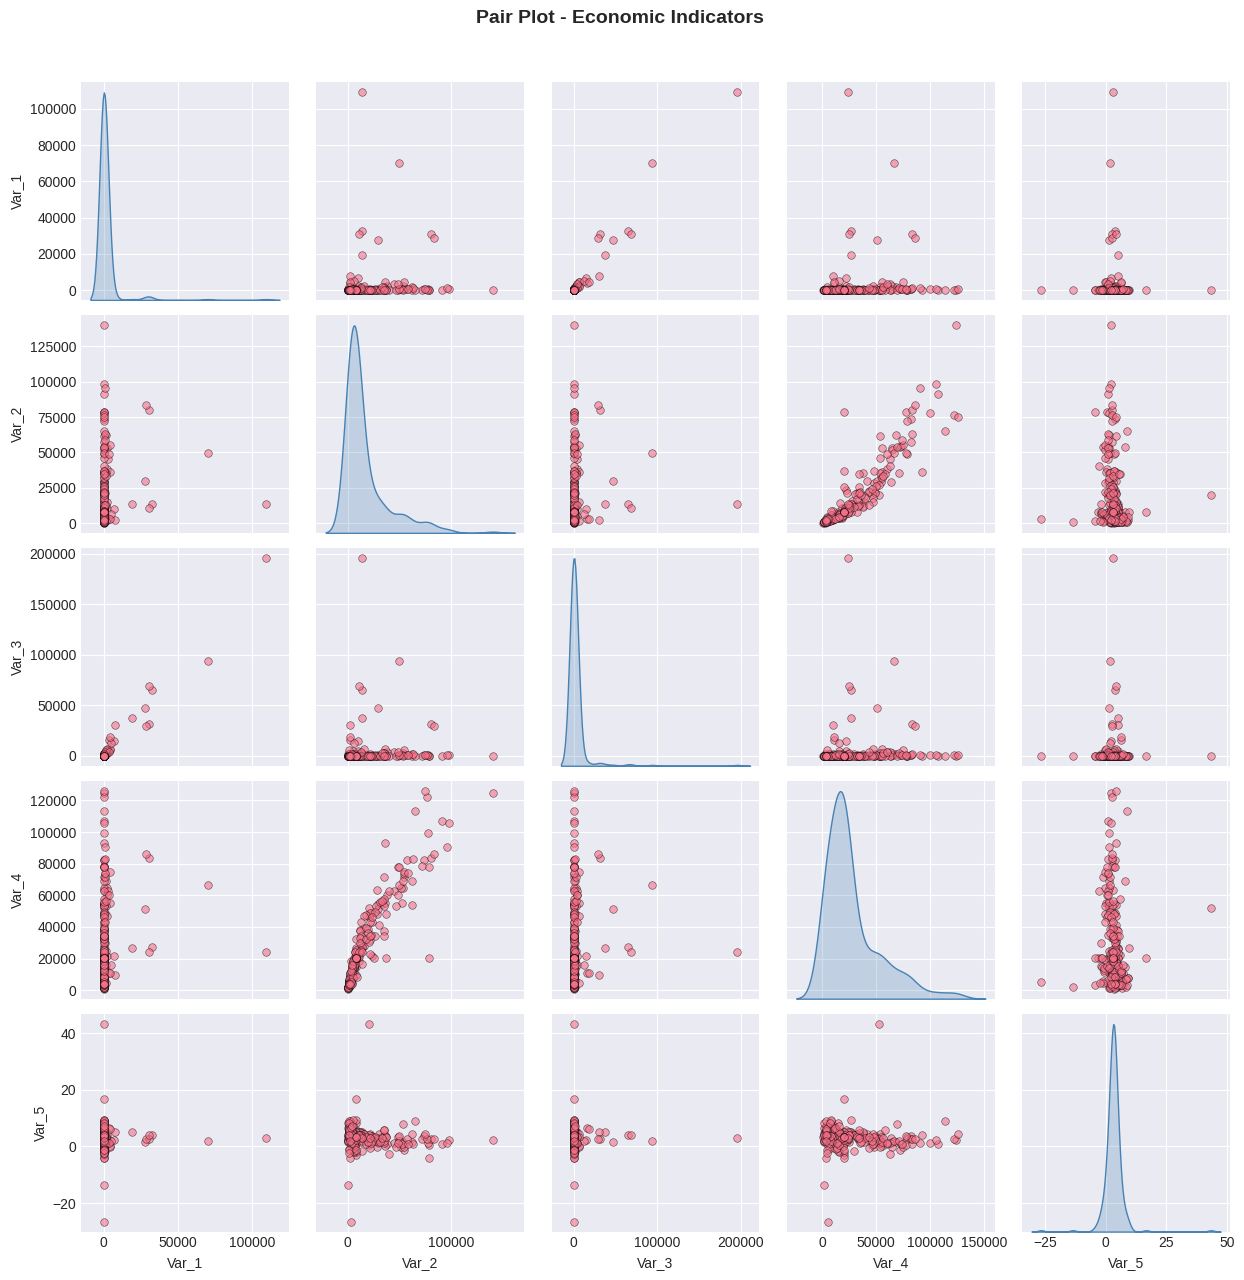

In [9]:
print("\n" + "="*70)
print("🔀 SCATTER PLOT MATRIX - DATASET 1")
print("="*70)

print("\n📊 Creating pair plot for top economic indicators...")

# Select top 5 key indicators for pair plot
pair_cols_d1 = [col for col in numeric_cols_d1 if any(
    keyword in col.lower() for keyword in ['gdp', 'income', 'growth']
)][:5]

if len(pair_cols_d1) >= 2:
    print(f"   Analyzing {len(pair_cols_d1)} variables...")

    # Copy selected columns
    df_pair_d1 = df_economic[pair_cols_d1].copy()

    # Ensure all columns are numeric
    df_pair_d1 = df_pair_d1.apply(pd.to_numeric, errors='coerce')

    # Drop columns that became all NaN
    df_pair_d1 = df_pair_d1.dropna(axis=1, how='all')

    # Ensure we still have at least 2 columns
    if df_pair_d1.shape[1] >= 2:

        # Make column names short and unique
        df_pair_d1.columns = [f"Var_{i+1}" for i in range(df_pair_d1.shape[1])]

        # Create the pair plot
        pairplot = sns.pairplot(df_pair_d1,
                                diag_kind='kde',
                                plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'},
                                diag_kws={'shade': True, 'color': 'steelblue'})

        pairplot.fig.suptitle('Pair Plot - Economic Indicators', 
                              fontsize=14, fontweight='bold', y=1.02)

        plt.tight_layout()
        plt.savefig(f'{output_dir}/pairplot_economic_indicators.png', dpi=300, bbox_inches='tight')
        print(f"   ✅ Saved: {output_dir}/pairplot_economic_indicators.png")
        plt.show()
    else:
        print("   ⚠️ Not enough valid numeric columns after cleaning")
else:
    print("   ⚠️ Not enough columns for pair plot")



📈 TIME SERIES ANALYSIS - DATASET 1

📊 Found 57 time-series related columns

   Creating time series plot for GDP indicators...
   ✅ Saved: ../../outputs/eda/timeseries_economic_trends.png


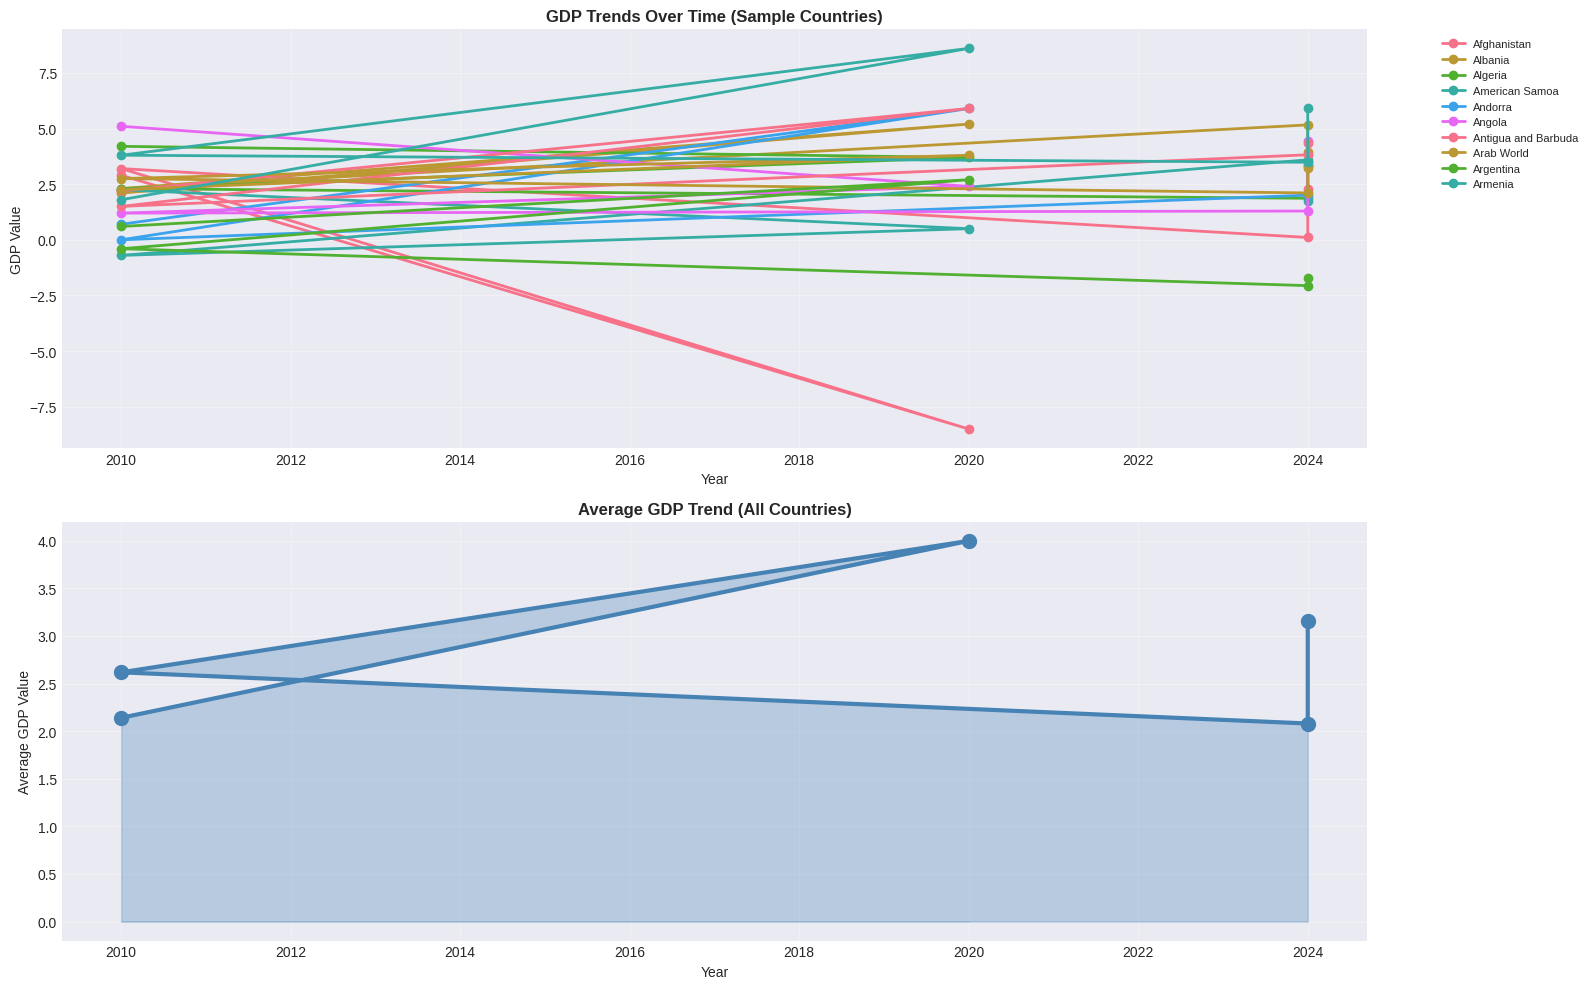

In [10]:
print("\n" + "="*70)
print("📈 TIME SERIES ANALYSIS - DATASET 1")
print("="*70)

# Check if we have time-series columns (columns with years)
time_cols_d1 = [col for col in df_economic.columns if any(
    year in col for year in ['2010', '2015', '2020', '2024', '2023', '2022']
)]

if len(time_cols_d1) > 0:
    print(f"\n📊 Found {len(time_cols_d1)} time-series related columns")
    
    # Extract GDP-related time series
    gdp_time_cols = [col for col in time_cols_d1 if 'GDP' in col or 'domestic product' in col]
    
    if len(gdp_time_cols) >= 2:
        print(f"\n   Creating time series plot for GDP indicators...")
        
        # Get a sample of countries for visualization
        sample_countries = df_economic['Country'].head(10).tolist()
        
        fig, axes = plt.subplots(2, 1, figsize=(16, 10))
        
        # Plot 1: Multiple countries comparison
        ax1 = axes[0]
        for country in sample_countries:
            country_data = df_economic[df_economic['Country'] == country]
            if not country_data.empty:
                values = []
                years = []
                for col in gdp_time_cols[:5]:  # Use first 5 time columns
                    # Extract year from column name
                    year_match = [y for y in ['2010', '2015', '2020', '2024', '2023', '2022'] if y in col]
                    if year_match:
                        values.append(country_data[col].values[0])
                        years.append(int(year_match[0]))
                
                if values and not all(pd.isna(values)):
                    ax1.plot(years, values, marker='o', label=country[:20], linewidth=2)
        
        ax1.set_title('GDP Trends Over Time (Sample Countries)', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Year', fontsize=10)
        ax1.set_ylabel('GDP Value', fontsize=10)
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Average trend across all countries
        ax2 = axes[1]
        avg_values = []
        years = []
        for col in gdp_time_cols[:5]:
            year_match = [y for y in ['2010', '2015', '2020', '2024', '2023', '2022'] if y in col]
            if year_match:
                avg_val = df_economic[col].mean()
                if not pd.isna(avg_val):
                    avg_values.append(avg_val)
                    years.append(int(year_match[0]))
        
        if avg_values:
            ax2.plot(years, avg_values, marker='o', linewidth=3, color='steelblue', markersize=10)
            ax2.fill_between(years, avg_values, alpha=0.3, color='steelblue')
        
        ax2.set_title('Average GDP Trend (All Countries)', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Year', fontsize=10)
        ax2.set_ylabel('Average GDP Value', fontsize=10)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/timeseries_economic_trends.png', dpi=300, bbox_inches='tight')
        print(f"   ✅ Saved: {output_dir}/timeseries_economic_trends.png")
        plt.show()
    else:
        print("   ⚠️ Not enough time-series columns for GDP analysis")
else:
    print("   ⚠️ No time-series columns found")


📊 TOP & BOTTOM COUNTRIES COMPARISON - DATASET 1

📊 Analyzing: GDP_Growth_Gross domestic product_average annual real growth (%)_2020-2024
✅ Saved figure: ../../outputs/eda/top_bottom_15_countries_GDP_Growth_Gross_domestic_product_average_annual_real_growth_(%)_2020-2024.png


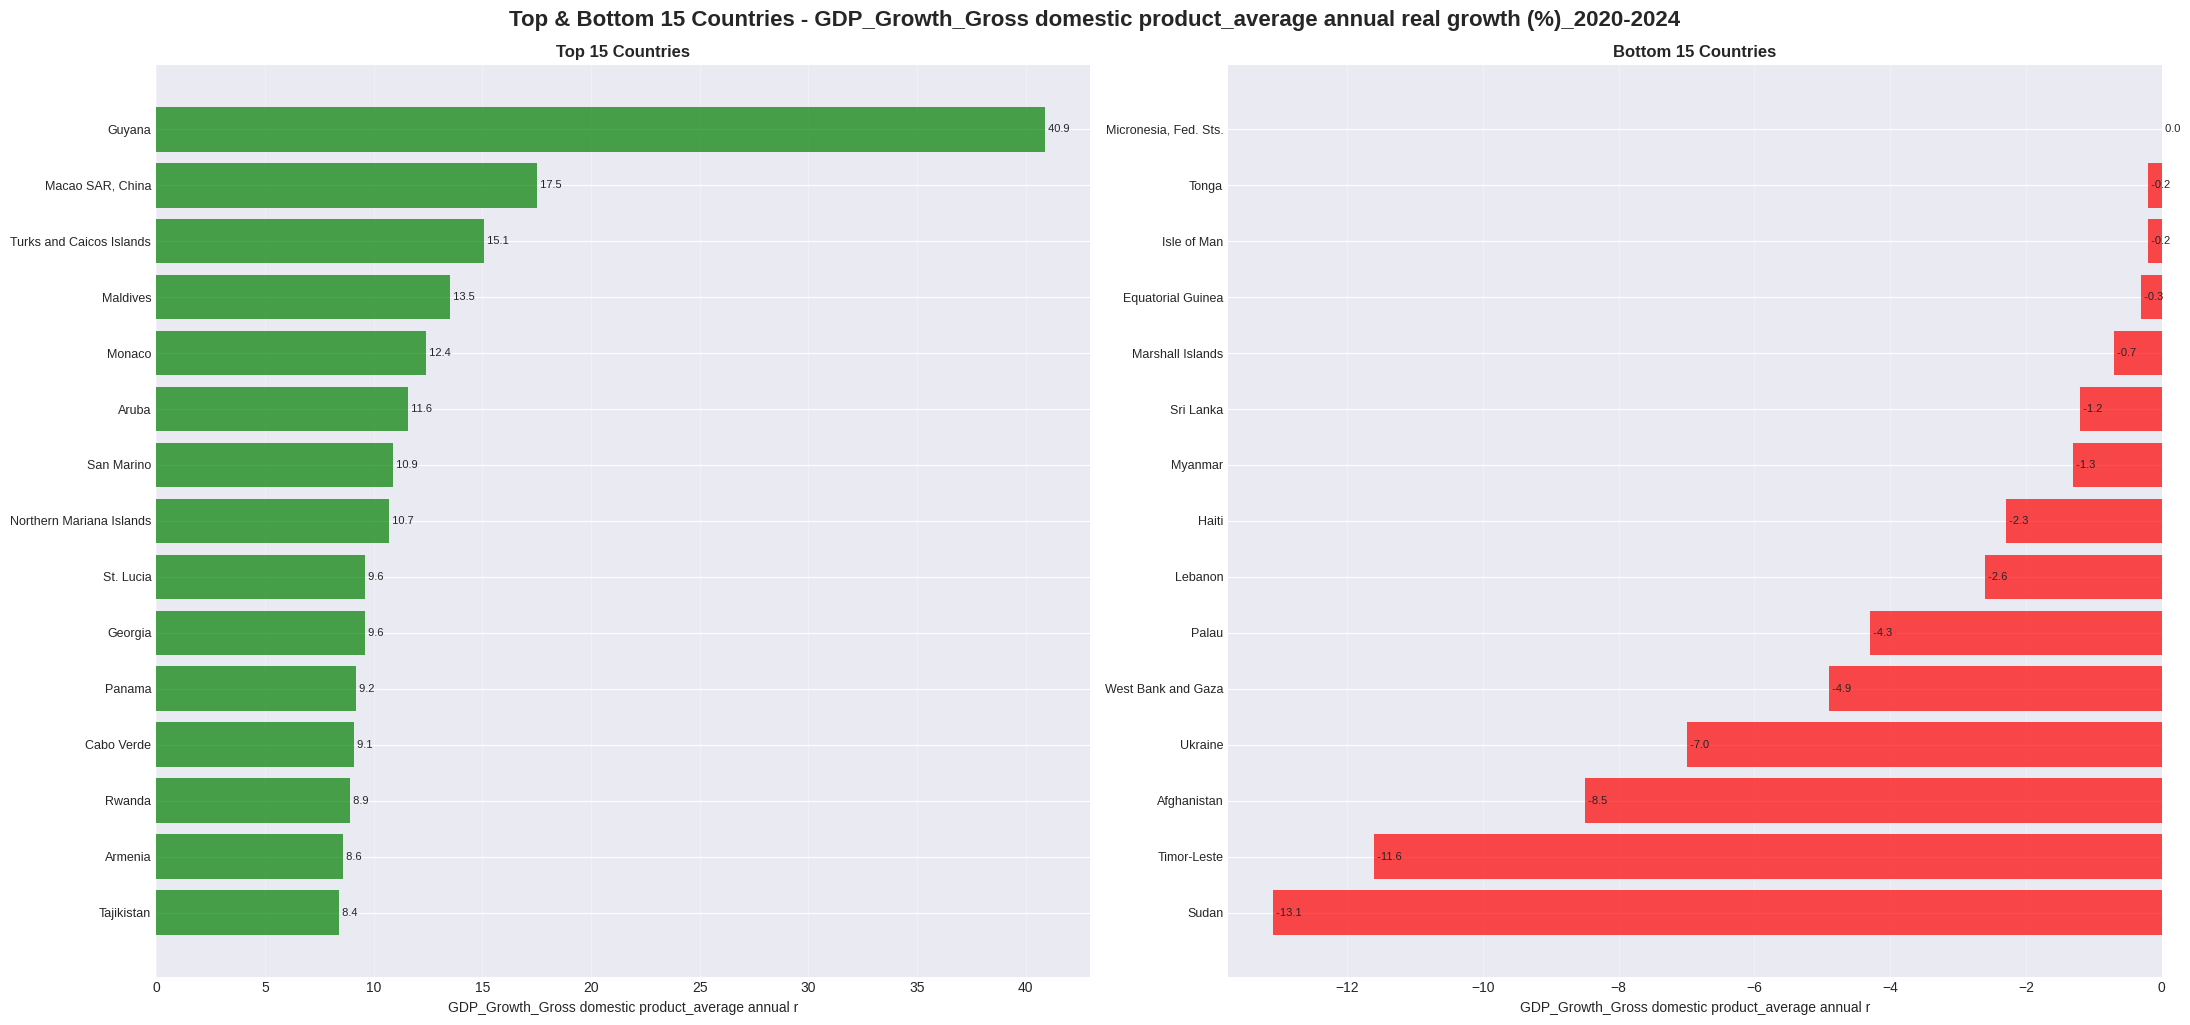

In [11]:
print("\n" + "="*70)
print("📊 TOP & BOTTOM COUNTRIES COMPARISON - DATASET 1")
print("="*70)

# Select a key indicator (e.g., GDP 2024)
gdp_col_2024 = [col for col in df_economic.columns if '2024' in col and 'GDP' in col]

if gdp_col_2024:
    gdp_col = gdp_col_2024[0]
    print(f"\n📊 Analyzing: {gdp_col}")
    
    # Get top 15 and bottom 15 countries
    df_sorted = df_economic[['Country', gdp_col]].dropna().sort_values(gdp_col, ascending=False)
    
    top_15 = df_sorted.head(15)
    bottom_15 = df_sorted.tail(15)
    
    fig, axes = plt.subplots(1, 2, figsize=(22, 10))
    
    # Top 15 countries
    ax1 = axes[0]
    bars1 = ax1.barh(range(len(top_15)), top_15[gdp_col], color='green', alpha=0.7)
    ax1.set_yticks(range(len(top_15)))
    ax1.set_yticklabels(top_15['Country'], fontsize=9)
    ax1.set_xlabel(gdp_col[:50], fontsize=10)
    ax1.set_title('Top 15 Countries', fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    ax1.invert_yaxis()  # largest on top
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars1, top_15[gdp_col])):
        ax1.text(value, i, f' {value:,.1f}', va='center', fontsize=8)
    
    # Bottom 15 countries
    ax2 = axes[1]
    bars2 = ax2.barh(range(len(bottom_15)), bottom_15[gdp_col], color='red', alpha=0.7)
    ax2.set_yticks(range(len(bottom_15)))
    ax2.set_yticklabels(bottom_15['Country'], fontsize=9)
    ax2.set_xlabel(gdp_col[:50], fontsize=10)
    ax2.set_title('Bottom 15 Countries', fontsize=12, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    ax2.invert_yaxis()  # smallest on top
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars2, bottom_15[gdp_col])):
        ax2.text(value, i, f' {value:,.1f}', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.suptitle(f'Top & Bottom 15 Countries - {gdp_col}', fontsize=16, fontweight='bold', y=1.02)
    
    # Save the figure
    plt.savefig(f'{output_dir}/top_bottom_15_countries_{gdp_col.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    print(f"✅ Saved figure: {output_dir}/top_bottom_15_countries_{gdp_col.replace(' ', '_')}.png")
    
    plt.show()
    
else:
    print("⚠️ No GDP 2024 column found in dataset")



📊 CORRELATION ANALYSIS - DATASET 1

🔍 Calculating correlations for key economic indicators...


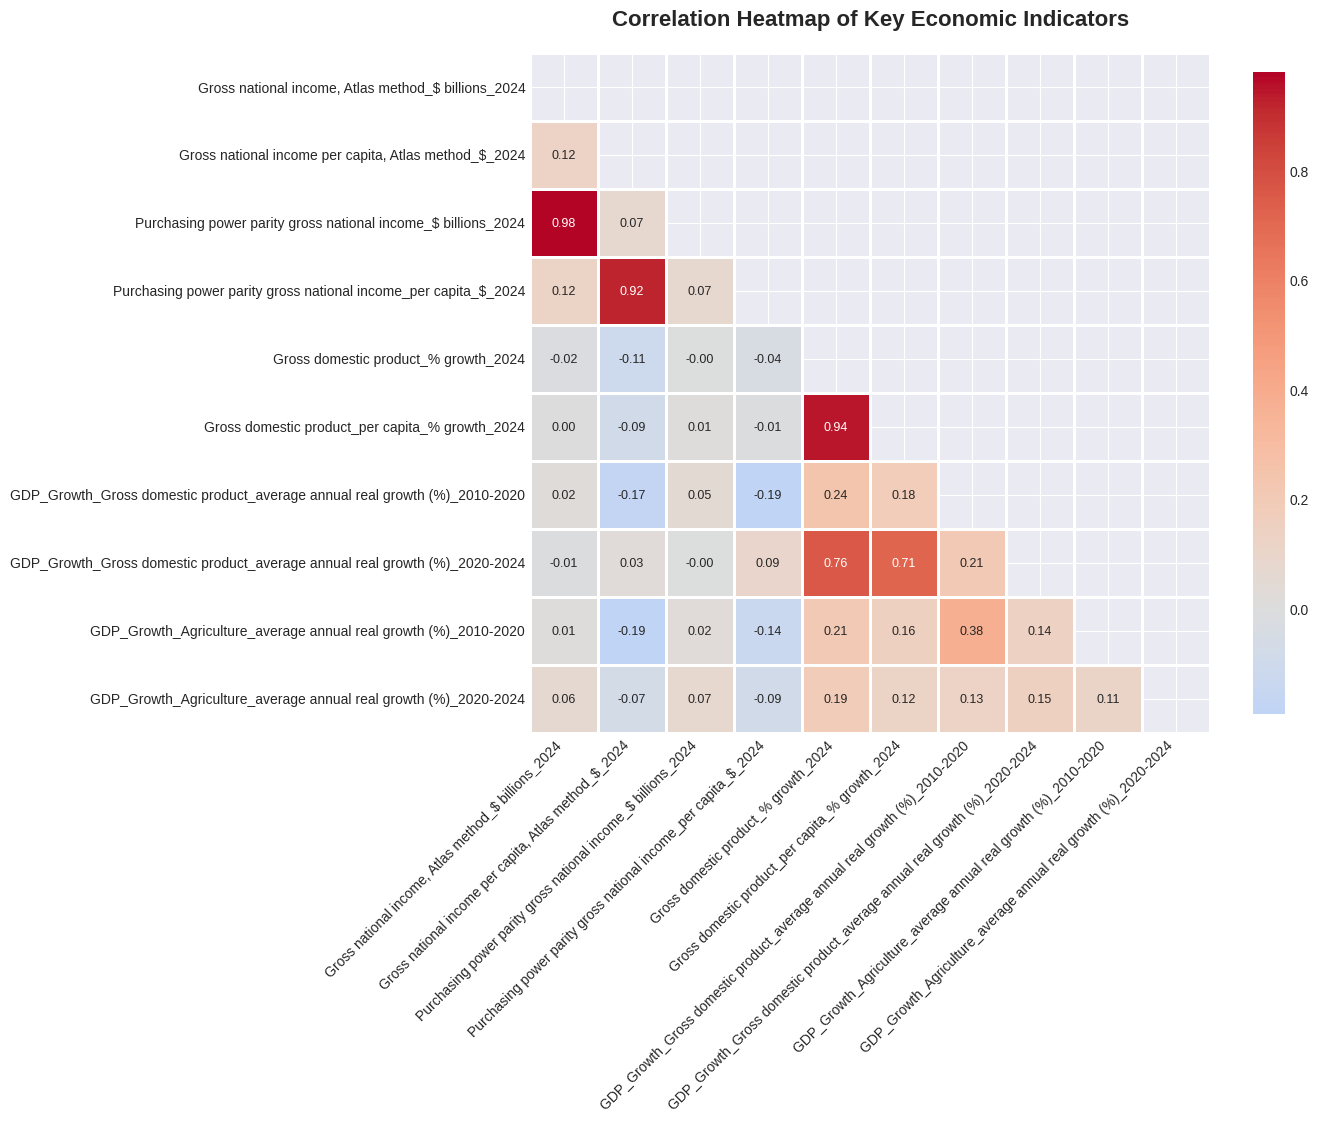

   ✅ Saved: ../../outputs/eda/correlation_heatmap_economic_indicators.png

📈 TOP POSITIVE CORRELATIONS:
   • 2024 & 2024: 0.980
   • 2024 & 2024: 0.980
   • 2024 & 2024: 0.940
   • 2024 & 2024: 0.940
   • 2024 & 2024: 0.917

📉 TOP NEGATIVE CORRELATIONS:
   • 2024 & 2010-2020: -0.171
   • 2024 & 2010-2020: -0.192
   • 2010-2020 & 2024: -0.192
   • 2010-2020 & 2024: -0.193
   • 2024 & 2010-2020: -0.193


In [13]:
# Cell to add correlation analysis and visualization
print("\n" + "="*70)
print("📊 CORRELATION ANALYSIS - DATASET 1")
print("="*70)

# Select a subset of key indicators for better visualization
key_indicators = [
    'Gross national income, Atlas method_$ billions_2024',
    'Gross national income per capita, Atlas method_$_2024',
    'Purchasing power parity gross national income_$ billions_2024',
    'Purchasing power parity gross national income_per capita_$_2024',
    'Gross domestic product_% growth_2024',
    'Gross domestic product_per capita_% growth_2024',
    'GDP_Growth_Gross domestic product_average annual real growth (%)_2010-2020',
    'GDP_Growth_Gross domestic product_average annual real growth (%)_2020-2024',
    'GDP_Growth_Agriculture_average annual real growth (%)_2010-2020',
    'GDP_Growth_Agriculture_average annual real growth (%)_2020-2024'
]

print("\n🔍 Calculating correlations for key economic indicators...")

# Calculate correlation matrix for selected indicators
correlation_matrix = df_economic[key_indicators].corr()

# Create a visually appealing correlation heatmap
plt.figure(figsize=(14, 12))

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap with custom styling
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            annot_kws={'size': 9})

# Customize the plot
plt.title('Correlation Heatmap of Key Economic Indicators', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
correlation_plot_path = f"{output_dir}/correlation_heatmap_economic_indicators.png"
plt.savefig(correlation_plot_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"   ✅ Saved: {correlation_plot_path}")

# Identify top correlations
print("\n📈 TOP POSITIVE CORRELATIONS:")
# Flatten correlation matrix and get top correlations (excluding diagonal)
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
corr_pairs = corr_pairs.sort_values(ascending=False)

# Get top 5 positive correlations
top_positive = corr_pairs.head(5)
for (ind1, ind2), value in top_positive.items():
    print(f"   • {ind1.split('_')[-1]} & {ind2.split('_')[-1]}: {value:.3f}")

print("\n📉 TOP NEGATIVE CORRELATIONS:")
# Get top 5 negative correlations
top_negative = corr_pairs.tail(5)
for (ind1, ind2), value in top_negative.items():
    print(f"   • {ind1.split('_')[-1]} & {ind2.split('_')[-1]}: {value:.3f}")


📊 SCATTER PLOT MATRIX - Top 6 Economic Indicators


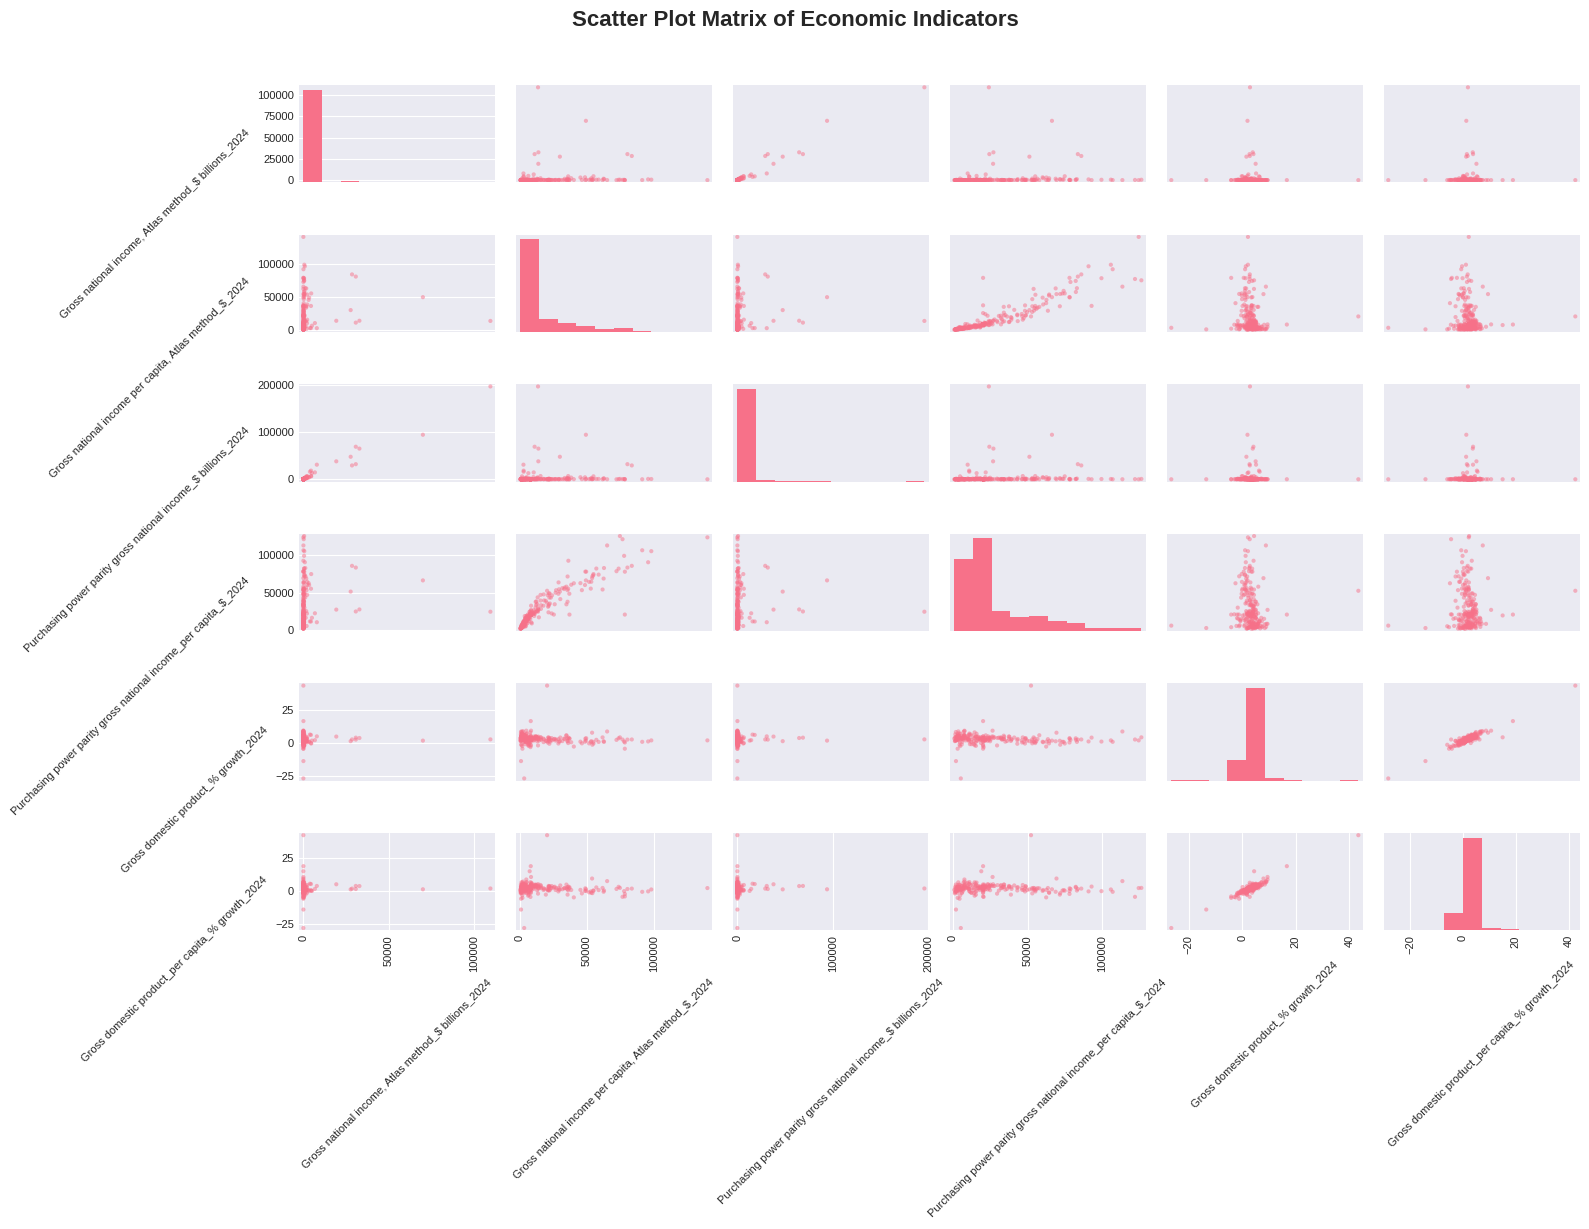

   ✅ Saved: ../../outputs/eda/scatter_matrix_economic_indicators.png

📊 INCOME GROUP COMPARISON (If income group data exists)


In [15]:
# Additional valuable visualization: Scatter plot matrix for key indicators
print("\n" + "="*70)
print("📊 SCATTER PLOT MATRIX - Top 6 Economic Indicators")
print("="*70)

# Select top 6 indicators for scatter plot matrix
scatter_indicators = key_indicators[:6]

# Create scatter plot matrix
scatter_matrix = pd.plotting.scatter_matrix(
    df_economic[scatter_indicators], 
    figsize=(16, 12),
    diagonal='hist',
    alpha=0.5,
    grid=True
)

# Improve readability
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(45)
    ax.yaxis.label.set_ha('right')
    ax.xaxis.label.set_fontsize(8)
    ax.yaxis.label.set_fontsize(8)

plt.suptitle('Scatter Plot Matrix of Economic Indicators', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Save the plot
scatter_plot_path = f"{output_dir}/scatter_matrix_economic_indicators.png"
plt.savefig(scatter_plot_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"   ✅ Saved: {scatter_plot_path}")

# Box plots by country income groups (if available in data)
print("\n" + "="*70)
print("📊 INCOME GROUP COMPARISON (If income group data exists)")
print("="*70)

# Check if we have income group or region data
# This would require the original dataset to have categorical grouping variables